Xibc analysis
=============
This notebook presnts all study on Xibc decay to JpisLc. 

We will se what xgboost can do.  
Study roadmap
------

1. Grab MC sugnal and background from NTuple.
2. Use the same set of feature. 
3. Play with model's hyperparameters 
4. Perform feature engeenering

After all of this steps I will try to use Deep Neural Network. 

<font color="red">TMVA baseline to beat is more than 97% (roc_auc). </font>  
--------

In [1]:
print("Kernel is alive!")

Kernel is alive!


In [2]:
import root_numpy
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import ROOT
%matplotlib inline

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

#sklearn imports 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn.metrics import classification_report

from sklearn.externals import joblib

import xgboost as xgb


Welcome to ROOTaaS 6.06/02


The very first step is to grab data from NTuple. 
--------
I take as a signal MC data and as a background wrong sign data.  
For a very first try I use only one background file. 

In [11]:
branches = ["Xb_LOKI_DTF_CHI2NDOF_massConstr", 
            "Xb_DIRA_OWNPV", 
           "Xb_ENDVERTEX_X",
            "Xb_OWNPV_X",
            "Xb_ENDVERTEX_Y",
            "Xb_OWNPV_Y",
            "Xb_PT",
            "Jpsi_IPCHI2_OWNPV",
            "Xc_PT",
            "Xc_IPCHI2_OWNPV",
            "Xc_TAU",
            "Pr_IPCHI2_OWNPV",
            "K_IPCHI2_OWNPV",
            "Pi_IPCHI2_OWNPV",
            "Pr_V3ProbNNp",
            "K_V3ProbNNk",
            "Pi_V3ProbNNpi",
            "Pr_P",
            "K_P",
            "Pi_P",
            "mup_IPCHI2_OWNPV",
            "mum_IPCHI2_OWNPV"]

In [4]:

root_file_signal = ROOT.TFile("../datasets/eos_data/mc/JpsiLc_mc.tuned.pkpi.root")
tree_signal = root_file_signal.Get("mytree")

data_signal = pd.DataFrame()

"""data_signal["Label"] = True

root_file_background = ROOT.TFile("../datasets/eos_data/data/All_2011_MAGUP.pkpi.ws.root")
tree_background = root_file_signal.Get("mytree")
data_background = pd.DataFrame(root_numpy.tree2array(tree_background, branches=branches))

data_background["Label"] = False


data = pd.concat([data_signal, data_background])
features = data.drop("Label", axis=1).astype(numpy.float64)
target = data.Label

data.head()
"""
data_signal.head()

Exception: Data must be 1-dimensional



In [65]:
def print_features_histograms(features, target):
    hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
    # create the figure
    fig = plt.figure(figsize=(16,  25))
    for n, feature in enumerate(features):
        # add sub plot on our figure
        ax = fig.add_subplot(features.shape[1] // 5 + 1, 6, n + 1)
        # define range for histograms by cutting 1% of data from both ends
        min_value, max_value = numpy.percentile(features[feature], [1, 99])
        ax.hist(features.ix[target == False, feature].values, range=(min_value, max_value), 
                 label='background', **hist_params)
        #ax.hist(features.ix[target == True, feature].values, range=(min_value, max_value), 
        #         label='signal', **hist_params)
        ax.legend(loc='best')

        ax.set_title(feature)

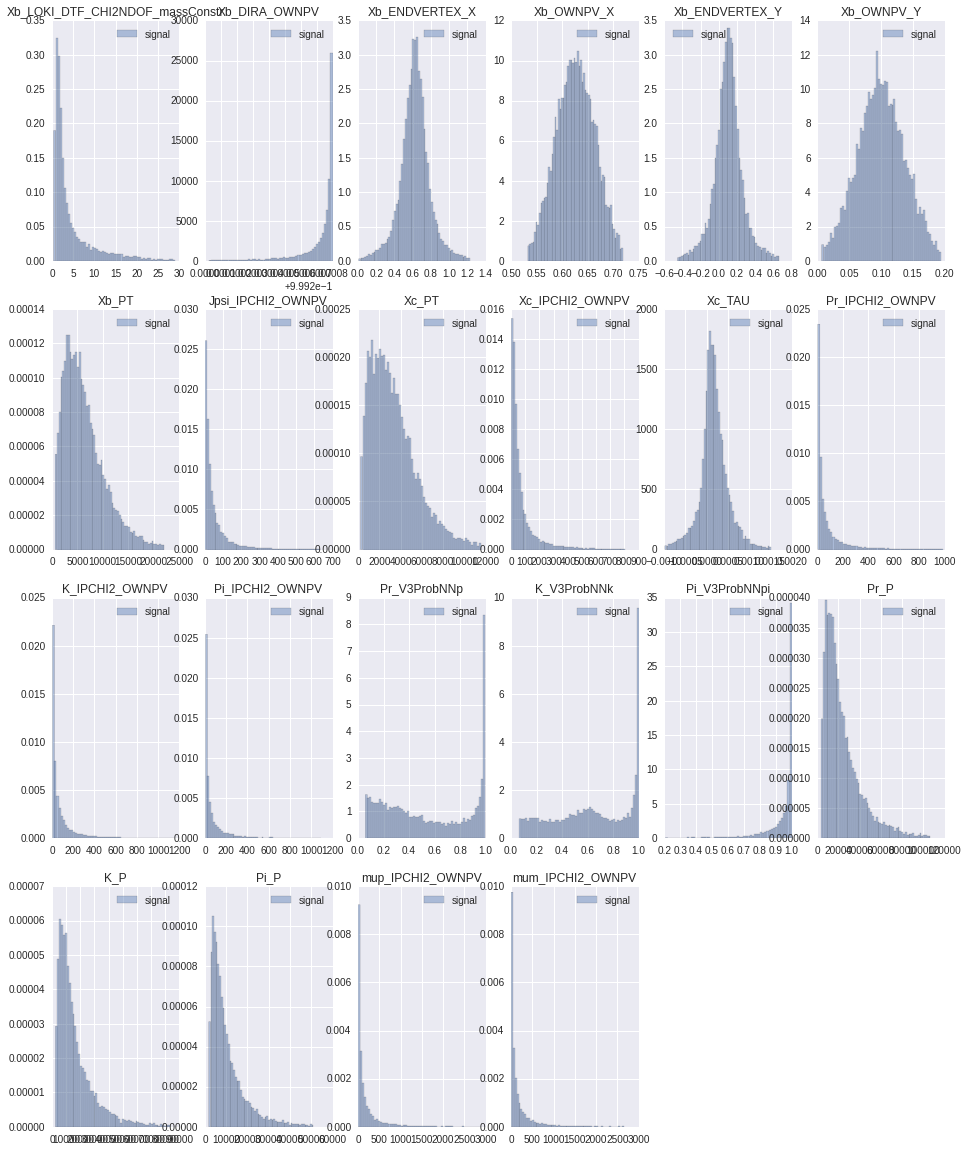

In [64]:
print_features_histograms(features, target)

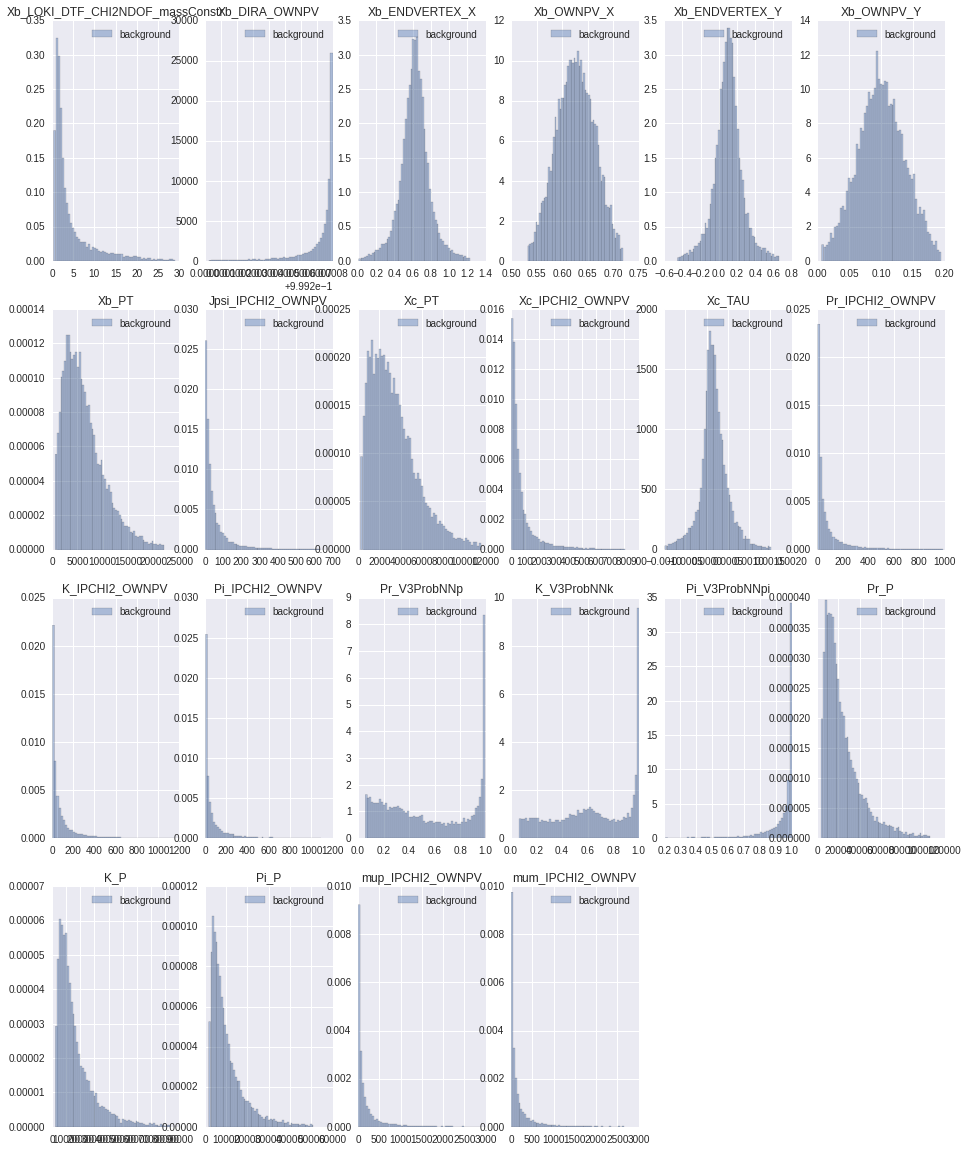

In [66]:
print_features_histograms(features, target)